# Lecture 01: Introduction

**Slides:** `01_Introduction.pdf`

## What you will learn
- What applied machine learning is (and is not)
- Supervised vs. unsupervised learning
- Train/test split and evaluation basics

## Notes
This notebook provides the conceptual starting point for the course.

## How to use this notebook
1. Run the **Setup** cell below (it will detect the repository root and set paths).
2. Run cells top-to-bottom. If a cell takes too long, skim it and continue — the goal is to learn the workflow, not to optimize runtime.

In [ ]:
# --- Setup (run this first) ---
from __future__ import annotations

import os
import sys
from pathlib import Path
from typing import Optional

def _find_repo_root(start: Optional[Path] = None) -> Path:
    """Find repo root by walking upwards and looking for common markers."""
    start = (start or Path.cwd()).resolve()
    for p in [start] + list(start.parents):
        if (p / "pyproject.toml").exists() and (p / "src").exists():
            return p
        if (p / "slides").exists() and (p / "notebooks").exists():
            return p
    return start

PROJECT_ROOT = _find_repo_root()
os.chdir(PROJECT_ROOT)

# Make `import aml_course` work without installing the package.
SRC_DIR = PROJECT_ROOT / "src"
if str(SRC_DIR) not in sys.path:
    sys.path.insert(0, str(SRC_DIR))

# Common paths used in the course.
DATA_DIR = PROJECT_ROOT / "data"
FIGURES_DIR = PROJECT_ROOT / "pictures"
MODELS_DIR = PROJECT_ROOT / "models"

DATA_DIR.mkdir(parents=True, exist_ok=True)
FIGURES_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)

print(f"📁 Project root: {PROJECT_ROOT}")
print(f"📦 Data dir:     {DATA_DIR}")
print(f"🖼️  Figures dir:  {FIGURES_DIR}")
print(f"🤖 Models dir:   {MODELS_DIR}")


# Introduction to Applied Machine Learning

## Introduction

Machine learning is a subset of artificial intelligence that involves training algorithms to make predictions or decisions based on input data. It is a way of teaching computers to learn from data, without being explicitly programmed.

## Supervised Learning

Supervised learning is a type of machine learning where the algorithm is trained on a labeled dataset. The algorithm learns to map inputs to outputs based on examples of input/output pairs. The goal is to learn a general rule that can be applied to new, unseen data.

### Real-world application example: Image classification

Image classification is a common example of supervised learning. Given a dataset of labeled images, the algorithm can learn to recognize patterns in the images and classify new images accordingly.

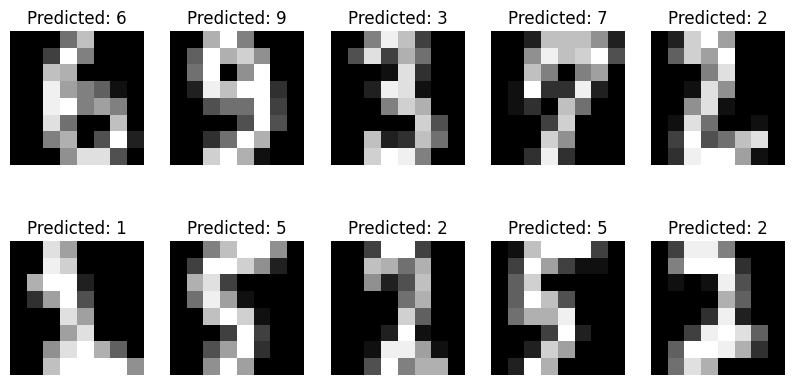

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Train a logistic regression model on the training set
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Visualize the model predictions
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
ax = ax.ravel()
for i in range(10):
    ax[i].imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax[i].set_title(f"Predicted: {y_pred[i]}")
    ax[i].axis('off')
plt.show()



## Unsupervised Learning

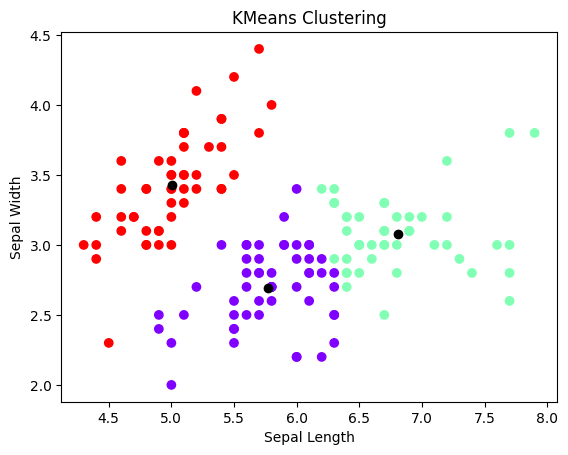

In [2]:
# This code performs KMeans clustering on the iris dataset, which contains measurements of different species of iris flowers. 
# The goal is to group the flowers into clusters based on their sepal length and width. 
# The code imports necessary libraries, loads the dataset, creates a KMeans object with 3 clusters, fits the data, and plots the resulting clusters.
# The black dots represent the centroids of each cluster.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('KMeans Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

